In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


# Load the network
G = nx.read_graphml('london.graph')

# Check the network
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Convert to DataFrame for better handling
centrality_df = pd.DataFrame({
  "Station": list(G.nodes()),
  "Degree Centrality": [round(v, 4) for v in degree_centrality.values()],
  "Betweenness Centrality": [round(v, 4) for v in betweenness_centrality.values()],
  "Closeness Centrality": [round(v, 4) for v in closeness_centrality.values()]
})

# Sort and get top 10 stations for each measure
top_degree = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10)
top_betweenness = centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(10)
top_closeness = centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(10)

# Display the tables
print("Top 10 Stations by Degree Centrality")
print(top_degree)

print("Top 10 Stations by Betweenness Centrality")
print(top_betweenness)

print("Top 10 Stations by Closeness Centrality")
print(top_closeness)



Number of nodes: 401
Number of edges: 467
Top 10 Stations by Degree Centrality
                      Station  Degree Centrality  Betweenness Centrality  \
5                   Stratford             0.0225                  0.2978   
50          Bank and Monument             0.0200                  0.2905   
229  King's Cross St. Pancras             0.0175                  0.2553   
18               Baker Street             0.0175                  0.1916   
180              Earl's Court             0.0150                  0.1259   
45              Oxford Circus             0.0150                  0.0538   
51           Liverpool Street             0.0150                  0.2708   
14                   Waterloo             0.0150                  0.2439   
16                 Green Park             0.0150                  0.2158   
7                Canning Town             0.0150                  0.0962   

     Closeness Centrality  
5                  0.1044  
50                 0.1136  


In [18]:
# Define the headers
headers = ["Rank", "Station (Degree)", "Degree Centrality", "Station (Betweenness)", "Betweenness Centrality", "Station (Closeness)", "Closeness Centrality"]

# Define the data
data = [
    [1, "Stratford", 0.0225, "Stratford", 0.2978, "Green Park", 0.1148],
    [2, "Bank and Monument", 0.0200, "Bank and Monument", 0.2905, "Bank and Monument", 0.1136],
    [3, "King's Cross St. Pancras", 0.0175, "Liverpool Street", 0.2708, "King's Cross St. Pancras", 0.1134],
    [4, "Baker Street", 0.0175, "King's Cross St. Pancras", 0.2553, "Westminster", 0.1125],
    [5, "Earl's Court", 0.0150, "Waterloo", 0.2439, "Waterloo", 0.1123],
    [6, "Oxford Circus", 0.0150, "Green Park", 0.2158, "Oxford Circus", 0.1112],
    [7, "Liverpool Street", 0.0150, "Euston", 0.2083, "Bond Street", 0.1110],
    [8, "Waterloo", 0.0150, "Westminster", 0.2033, "Farringdon", 0.1107],
    [9, "Green Park", 0.0150, "Baker Street", 0.1916, "Angel", 0.1107],
    [10, "Canning Town", 0.0150, "Finchley Road", 0.1651, "Liverpool Street", 0.1103]
]

# Print headers
print("\t".join(headers))

# Print data
for row in data:
    print("\t".join(str(item) for item in row))

Rank	Station (Degree)	Degree Centrality	Station (Betweenness)	Betweenness Centrality	Station (Closeness)	Closeness Centrality
1	Stratford	0.0225	Stratford	0.2978	Green Park	0.1148
2	Bank and Monument	0.02	Bank and Monument	0.2905	Bank and Monument	0.1136
3	King's Cross St. Pancras	0.0175	Liverpool Street	0.2708	King's Cross St. Pancras	0.1134
4	Baker Street	0.0175	King's Cross St. Pancras	0.2553	Westminster	0.1125
5	Earl's Court	0.015	Waterloo	0.2439	Waterloo	0.1123
6	Oxford Circus	0.015	Green Park	0.2158	Oxford Circus	0.1112
7	Liverpool Street	0.015	Euston	0.2083	Bond Street	0.111
8	Waterloo	0.015	Westminster	0.2033	Farringdon	0.1107
9	Green Park	0.015	Baker Street	0.1916	Angel	0.1107
10	Canning Town	0.015	Finchley Road	0.1651	Liverpool Street	0.1103


In [1]:
import pandas as pd
import networkx as nx

# Load the data
data = pd.read_csv('London_flows.csv')

# Create a weighted graph
G_weighted = nx.Graph()

# Add edges with flows as weights
for _, row in data.iterrows():
    G_weighted.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'])

# Weighted Degree Centrality
weighted_degree_centrality = {node: sum(data['weight'] for _, _, data in G_weighted.edges(node, data=True)) for node in G_weighted.nodes()}

# Weighted Betweenness Centrality
weighted_betweenness_centrality = nx.betweenness_centrality(G_weighted, weight='weight')

# Weighted Closeness Centrality
weighted_closeness_centrality = nx.closeness_centrality(G_weighted, distance='weight')

# Sort nodes by centrality
weighted_degree_sorted = sorted(weighted_degree_centrality, key=weighted_degree_centrality.get, reverse=True)
weighted_betweenness_sorted = sorted(weighted_betweenness_centrality, key=weighted_betweenness_centrality.get, reverse=True)
weighted_closeness_sorted = sorted(weighted_closeness_centrality, key=weighted_closeness_centrality.get, reverse=True)

# Output the top 10 nodes for each centrality measure
print("Top 10 Weighted Degree Centrality Nodes:", weighted_degree_sorted[:10])
print("Top 10 Weighted Betweenness Centrality Nodes:", weighted_betweenness_sorted[:10])
print("Top 10 Weighted Closeness Centrality Nodes:", weighted_closeness_sorted[:10])

Top 10 Weighted Degree Centrality Nodes: ['Bank and Monument', 'Waterloo', 'Stratford', 'Canary Wharf', 'Liverpool Street', 'Victoria', 'London Bridge', "King's Cross St. Pancras", 'Paddington', 'Oxford Circus']
Top 10 Weighted Betweenness Centrality Nodes: ['West Ham', 'West Brompton', "Shepherd's Bush", 'Kew Gardens', 'Surrey Quays', 'Kenton', 'Richmond', 'Willesden Junction', 'Kentish Town West', 'Stratford']
Top 10 Weighted Closeness Centrality Nodes: ['Abbey Road', 'Bank and Monument', 'Beckton', 'Blackwall', 'Canary Wharf', 'Canning Town', 'Crossharbour', 'Custom House', 'Cutty Sark', 'Cyprus']


In [1]:
# Define the headers
headers = [
    "Rank", 
    "Station (Degree)", 
    "Station (Betweenness)", 
    "Station (Closeness)"
]

# Define the data
degree_centrality_nodes = [
    'Bank and Monument', 'Waterloo', 'Stratford', 'Canary Wharf', 
    'Liverpool Street', 'Victoria', 'London Bridge', 
    "King's Cross St. Pancras", 'Paddington', 'Oxford Circus'
]

betweenness_centrality_nodes = [
    'West Ham', 'West Brompton', "Shepherd's Bush", 'Kew Gardens', 
    'Surrey Quays', 'Kenton', 'Richmond', 
    'Willesden Junction', 'Kentish Town West', 'Stratford'
]

closeness_centrality_nodes = [
    'Abbey Road', 'Bank and Monument', 'Beckton', 'Blackwall', 
    'Canary Wharf', 'Canning Town', 'Crossharbour', 
    'Custom House', 'Cutty Sark', 'Cyprus'
]

# Combine the data into a list of lists
data = [
    [i+1, degree_centrality_nodes[i], betweenness_centrality_nodes[i], closeness_centrality_nodes[i]] 
    for i in range(10)
]

# Print headers
print("\t".join(headers))

# Print data
for row in data:
    print("\t".join(str(item) for item in row))

Rank	Station (Degree)	Station (Betweenness)	Station (Closeness)
1	Bank and Monument	West Ham	Abbey Road
2	Waterloo	West Brompton	Bank and Monument
3	Stratford	Shepherd's Bush	Beckton
4	Canary Wharf	Kew Gardens	Blackwall
5	Liverpool Street	Surrey Quays	Canary Wharf
6	Victoria	Kenton	Canning Town
7	London Bridge	Richmond	Crossharbour
8	King's Cross St. Pancras	Willesden Junction	Custom House
9	Paddington	Kentish Town West	Cutty Sark
10	Oxford Circus	Stratford	Cyprus


Optimal distance decay parameter (b): 0.0001525418770978545
R-squared: 0.4852087688054094
Total observed flows: 1542288.0
Total predicted flows: 1542390.9999999998
Difference: 102.99999999976717


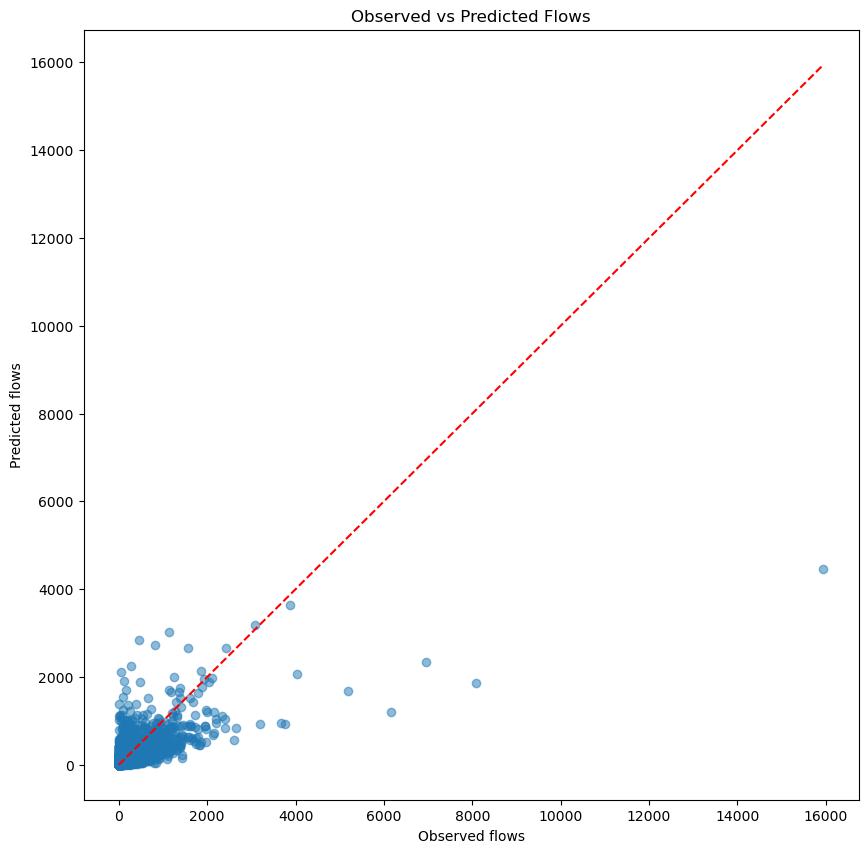

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('London_flows.csv')

# Create unique list of stations
stations = pd.concat([data['station_origin'], data['station_destination']]).unique()
station_to_index = {station: index for index, station in enumerate(stations)}
n = len(stations)

# Create origin and destination arrays
Oi = np.zeros(n)
Dj = np.zeros(n)

# Function to safely calculate the ratio
def safe_ratio(numerator, denominator):
    if denominator == 0:
        return 0  
    return numerator / denominator

# Fill Oi and Dj arrays
for station in stations:
    i = station_to_index[station]
    origin_data = data[data['station_origin'] == station]
    destination_data = data[data['station_destination'] == station]
    
    Oi[i] = origin_data['population'].iloc[0] if not origin_data.empty else 0
    Dj[i] = destination_data['jobs'].iloc[0] if not destination_data.empty else 0

# Create distance and flow matrices
distance_matrix = np.full((n, n), np.inf)
Tij_obs = np.zeros((n, n))

# Fill distance and flow matrices
for _, row in data.iterrows():
    i = station_to_index[row['station_origin']]
    j = station_to_index[row['station_destination']]
    distance_matrix[i, j] = row['distance']
    Tij_obs[i, j] = row['flows']

# Function to calculate flows using the doubly constrained model
def calculate_flows(b, Oi, Dj, dij):
    f_dij = np.exp(-b * dij)
    f_dij[np.isinf(dij)] = 0  # Set f(dij) to 0 where distance is inf
    
    # Initialize Ai and Bj
    Ai = np.ones_like(Oi)
    Bj = np.ones_like(Dj)
    
    for _ in range(20):  # Iterate to convergence (you might need to adjust this)
        Bj = np.array([safe_ratio(1, sum) for sum in np.sum(Ai[:, np.newaxis] * Oi[:, np.newaxis] * f_dij, axis=0)])
        Ai = np.array([safe_ratio(1, sum) for sum in np.sum((Bj * Dj)[np.newaxis, :] * f_dij, axis=1)])
    
    return Ai[:, np.newaxis] * Oi[:, np.newaxis] * Bj * Dj * f_dij

# Objective function to minimize (root mean square error)
def objective(b, Oi, Dj, Tij_obs, dij):
    Tij_pred = calculate_flows(b, Oi, Dj, dij)
    mask = (Tij_obs > 0) & (~np.isinf(dij))  # Consider only non-zero observed flows and finite distances
    return np.sqrt(np.mean((Tij_obs[mask] - Tij_pred[mask])**2))

# Calibrate the model
result = minimize_scalar(objective, args=(Oi, Dj, Tij_obs, distance_matrix), 
                         method='bounded', bounds=(0, 0.1))

# Get the optimal b value
optimal_b = result.x

print(f"Optimal distance decay parameter (b): {optimal_b}")

# Calculate predicted flows using the optimal b
Tij_pred = calculate_flows(optimal_b, Oi, Dj, distance_matrix)

# Calculate R-squared
mask = (Tij_obs > 0) & (~np.isinf(distance_matrix))
SS_tot = np.sum((Tij_obs[mask] - np.mean(Tij_obs[mask]))**2)
SS_res = np.sum((Tij_obs[mask] - Tij_pred[mask])**2)
r_squared = 1 - (SS_res / SS_tot)

print(f"R-squared: {r_squared}")

# Additional analysis: Compare observed vs predicted flows
total_observed = np.sum(Tij_obs)
total_predicted = np.sum(Tij_pred)
print(f"Total observed flows: {total_observed}")
print(f"Total predicted flows: {total_predicted}")
print(f"Difference: {total_predicted - total_observed}")

# Scatter plot of observed vs predicted flows
plt.figure(figsize=(10, 10))
plt.scatter(Tij_obs[mask], Tij_pred[mask], alpha=0.5)
plt.plot([0, np.max(Tij_obs)], [0, np.max(Tij_obs)], 'r--')
plt.xlabel('Observed flows')
plt.ylabel('Predicted flows')
plt.title('Observed vs Predicted Flows')
plt.show()

In [2]:
import numpy as np
import pandas as pd

# Function to calculate flows (same as before)
def calculate_flows(b, Oi, Dj, dij):
    f_dij = np.exp(-b * dij)
    f_dij[np.isinf(dij)] = 0
    
    Ai = np.ones_like(Oi)
    Bj = np.ones_like(Dj)
    
    for _ in range(20):
        Bj = 1 / np.sum(Ai[:, np.newaxis] * Oi[:, np.newaxis] * f_dij, axis=0, where=~np.isinf(dij))
        Ai = 1 / np.sum((Bj * Dj)[np.newaxis, :] * f_dij, axis=1, where=~np.isinf(dij))
    
    return Ai[:, np.newaxis] * Oi[:, np.newaxis] * Bj * Dj * f_dij

# Original total number of commuters
original_total_commuters = np.sum(Oi)

# Find the index of Canary Wharf
canary_wharf_index = station_to_index['Canary Wharf']

# Reduce Canary Wharf jobs by 50%
Dj_scenario = Dj.copy()
Dj_scenario[canary_wharf_index] *= 0.5

# Calculate new flows
Tij_scenario = calculate_flows(optimal_b, Oi, Dj_scenario, distance_matrix)

# Calculate the scaling factor to conserve total commuters
scaling_factor = original_total_commuters / np.sum(Tij_scenario)

# Scale the flows to conserve total commuters
Tij_scenario_scaled = Tij_scenario * scaling_factor

# Recalculate Oi based on the scaled flows
Oi_new = np.sum(Tij_scenario_scaled, axis=1)

# Print results
print(f"Original total commuters: {original_total_commuters}")
print(f"New total commuters: {np.sum(Tij_scenario_scaled)}")
print(f"Difference: {np.sum(Tij_scenario_scaled) - original_total_commuters}")

# Calculate the change in flows for each origin-destination pair
flow_changes = Tij_scenario_scaled - calculate_flows(optimal_b, Oi, Dj, distance_matrix)

# Find the top 5 most affected origin-destination pairs
top_affected = np.unravel_index(np.argsort(flow_changes.ravel())[-5:], flow_changes.shape)
for i, j in zip(top_affected[0], top_affected[1]):
    origin = list(station_to_index.keys())[list(station_to_index.values()).index(i)]
    destination = list(station_to_index.keys())[list(station_to_index.values()).index(j)]
    change = flow_changes[i, j]
    print(f"Flow from {origin} to {destination} changed by {change:.2f}")

# Calculate the total change in flows to Canary Wharf
canary_wharf_change = np.sum(flow_changes[:, canary_wharf_index])
print(f"Total change in flows to Canary Wharf: {canary_wharf_change:.2f}")

Original total commuters: 1542391.0
New total commuters: 1542391.0
Difference: 0.0
Flow from Stratford to Liverpool Street changed by 136.19
Flow from Woolwich Arsenal to Bank and Monument changed by 154.22
Flow from Woolwich Arsenal to Stratford changed by 156.14
Flow from Limehouse to Bank and Monument changed by 194.33
Flow from Lewisham to Bank and Monument changed by 215.31
Total change in flows to Canary Wharf: -28815.25


Original b: 0.0001525418770978545
Scenario 1 b: 0.000305083754195709
Scenario 2 b: 0.0007627093854892725

Total Flows:
Original: 1542391
Scenario 1: 1542391
Scenario 2: 1542391

Maximum Flow:
Original: 4448
Scenario 1: 5320
Scenario 2: 9071

Average Flow (non-zero flows):
Original: 25.11
Scenario 1: 25.11
Scenario 2: 25.11

Top 5 most affected flows (Scenario 1):
Flow from station 162 to 0: nan% change
Flow from station 161 to 398: nan% change
Flow from station 161 to 396: nan% change
Flow from station 162 to 38: nan% change
Flow from station 398 to 398: nan% change

Top 5 most affected flows (Scenario 2):
Flow from station 162 to 0: nan% change
Flow from station 161 to 398: nan% change
Flow from station 161 to 396: nan% change
Flow from station 162 to 38: nan% change
Flow from station 398 to 398: nan% change


/tmp/ipykernel_69769/3366219006.py:63: RuntimeWarning: invalid value encountered in divide
  change_scenario_1 = (Tij_scenario_1 - Tij_original) / Tij_original * 100
/tmp/ipykernel_69769/3366219006.py:64: RuntimeWarning: invalid value encountered in divide
  change_scenario_2 = (Tij_scenario_2 - Tij_original) / Tij_original * 100


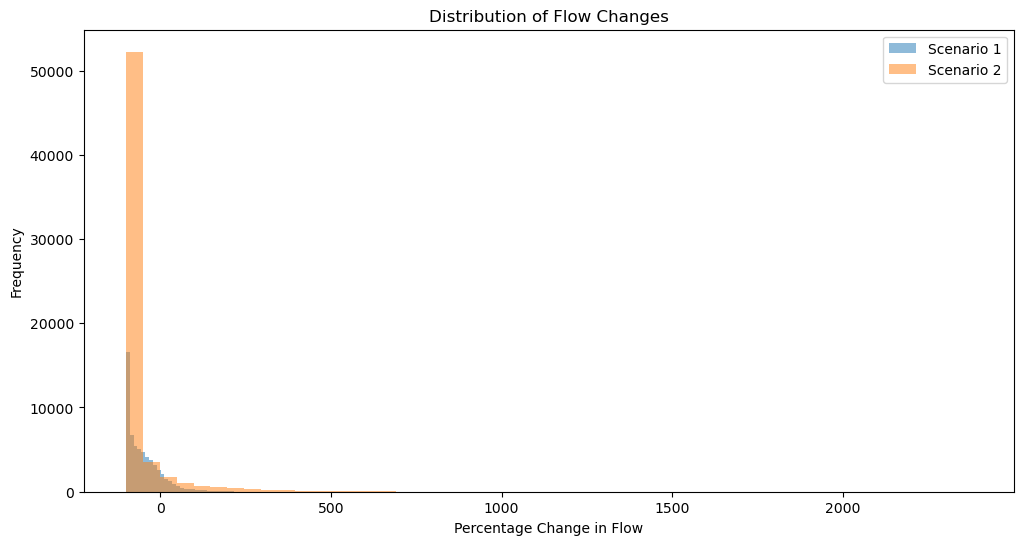

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_flows(b, Oi, Dj, dij):
    f_dij = np.exp(-b * dij)
    f_dij[np.isinf(dij)] = 0
    
    Ai = np.ones_like(Oi)
    Bj = np.ones_like(Dj)
    
    for _ in range(20):
        Bj = 1 / np.sum(Ai[:, np.newaxis] * Oi[:, np.newaxis] * f_dij, axis=0, where=~np.isinf(dij))
        Ai = 1 / np.sum((Bj * Dj)[np.newaxis, :] * f_dij, axis=1, where=~np.isinf(dij))
    
    return Ai[:, np.newaxis] * Oi[:, np.newaxis] * Bj * Dj * f_dij

# Original b value
original_b = 0.0001525418770978545

# New b values for Scenario B
b_scenario_1 = original_b * 2  # Double the original value
b_scenario_2 = original_b * 5  # Five times the original value

# Calculate flows for each scenario
Tij_original = calculate_flows(original_b, Oi, Dj, distance_matrix)
Tij_scenario_1 = calculate_flows(b_scenario_1, Oi, Dj, distance_matrix)
Tij_scenario_2 = calculate_flows(b_scenario_2, Oi, Dj, distance_matrix)

# Function to calculate statistics
def calculate_stats(flows):
    total_flows = np.sum(flows)
    max_flow = np.max(flows)
    avg_flow = np.mean(flows[flows > 0])
    return total_flows, max_flow, avg_flow

# Calculate statistics for each scenario
stats_original = calculate_stats(Tij_original)
stats_scenario_1 = calculate_stats(Tij_scenario_1)
stats_scenario_2 = calculate_stats(Tij_scenario_2)

# Print results
print(f"Original b: {original_b}")
print(f"Scenario 1 b: {b_scenario_1}")
print(f"Scenario 2 b: {b_scenario_2}")

print("\nTotal Flows:")
print(f"Original: {stats_original[0]:.0f}")
print(f"Scenario 1: {stats_scenario_1[0]:.0f}")
print(f"Scenario 2: {stats_scenario_2[0]:.0f}")

print("\nMaximum Flow:")
print(f"Original: {stats_original[1]:.0f}")
print(f"Scenario 1: {stats_scenario_1[1]:.0f}")
print(f"Scenario 2: {stats_scenario_2[1]:.0f}")

print("\nAverage Flow (non-zero flows):")
print(f"Original: {stats_original[2]:.2f}")
print(f"Scenario 1: {stats_scenario_1[2]:.2f}")
print(f"Scenario 2: {stats_scenario_2[2]:.2f}")

# Calculate percentage changes in flows
change_scenario_1 = (Tij_scenario_1 - Tij_original) / Tij_original * 100
change_scenario_2 = (Tij_scenario_2 - Tij_original) / Tij_original * 100

# Find top 5 most affected flows
top_affected_1 = np.unravel_index(np.argsort(np.abs(change_scenario_1.ravel()))[-5:], change_scenario_1.shape)
top_affected_2 = np.unravel_index(np.argsort(np.abs(change_scenario_2.ravel()))[-5:], change_scenario_2.shape)

print("\nTop 5 most affected flows (Scenario 1):")
for i, j in zip(top_affected_1[0], top_affected_1[1]):
    print(f"Flow from station {i} to {j}: {change_scenario_1[i,j]:.2f}% change")

print("\nTop 5 most affected flows (Scenario 2):")
for i, j in zip(top_affected_2[0], top_affected_2[1]):
    print(f"Flow from station {i} to {j}: {change_scenario_2[i,j]:.2f}% change")

# Visualize the distribution of flow changes
plt.figure(figsize=(12, 6))
plt.hist(change_scenario_1.ravel(), bins=50, alpha=0.5, label='Scenario 1')
plt.hist(change_scenario_2.ravel(), bins=50, alpha=0.5, label='Scenario 2')
plt.xlabel('Percentage Change in Flow')
plt.ylabel('Frequency')
plt.title('Distribution of Flow Changes')
plt.legend()
plt.show()